In [7]:
import numpy as np
import math

L , d_k, d_v = 4, 8, 8
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

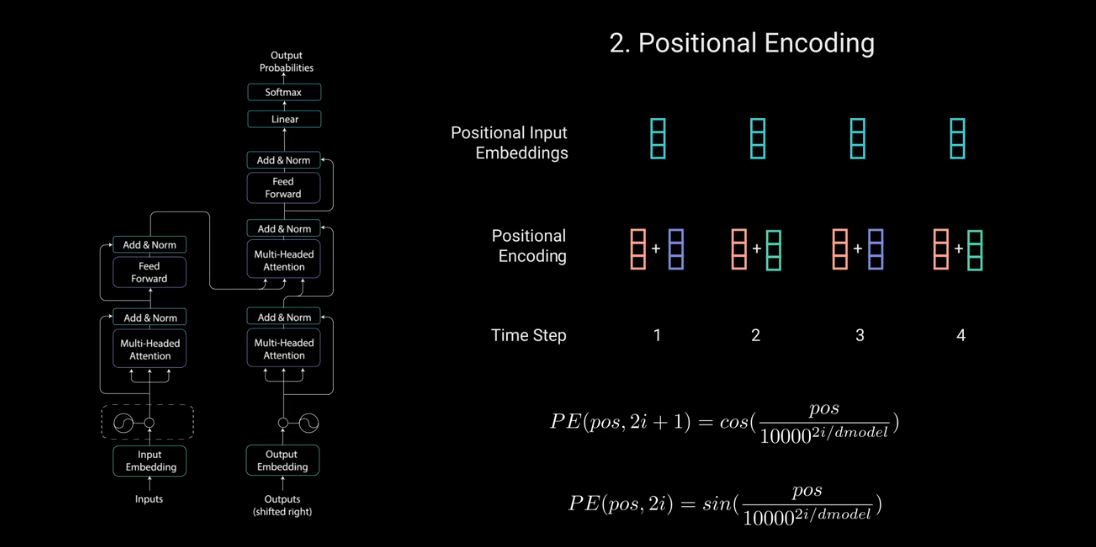

In [8]:
print("Q\n", q)  #query
print("K\n", k)  #key
print("V\n", v)  #value
# think of it as youtube search as query, key are video related #s and value is video

Q
 [[ 1.73742757  1.32160863 -0.94906662 -3.69249585  1.03443318 -1.40434221
  -0.36132255  1.14402465]
 [ 1.23881778 -0.83675353 -0.03357018 -0.22818115 -1.05809573 -1.00187761
  -0.32746587  0.73547724]
 [-1.11333408  0.6935187   1.13220436 -0.32130963 -0.67059391  0.12340236
  -0.29572647  0.27592668]
 [ 0.76320072  0.84650634 -1.13741988  1.38665182  0.82190223 -0.09284005
   1.17841092 -1.05602639]]
K
 [[ 1.10769874 -0.9711536   0.85148176  1.12455025  0.62614322 -1.39115454
   0.59552151 -1.51699205]
 [ 1.29730118  0.82453343 -0.96106862 -0.31636941 -0.00350175  0.54790002
   0.24707431  0.61592723]
 [-0.04578109  0.1948806  -1.70365708 -0.48896938 -0.22635054  0.33376372
   0.01421176  0.97013297]
 [-0.02509755 -0.26579305  0.40715375  0.56045725 -1.47938145  1.77366876
  -1.46530454 -0.96152185]]
V
 [[ 1.03435299 -1.2690233  -0.58672212 -1.54268604  1.0306054  -2.17923875
   0.99494226  0.97747002]
 [ 0.34131083  0.44457853 -0.68942082  1.39869828 -0.00791131  1.35735113
  -0.9

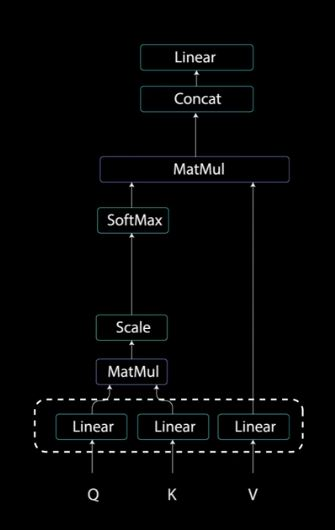

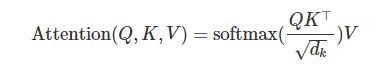

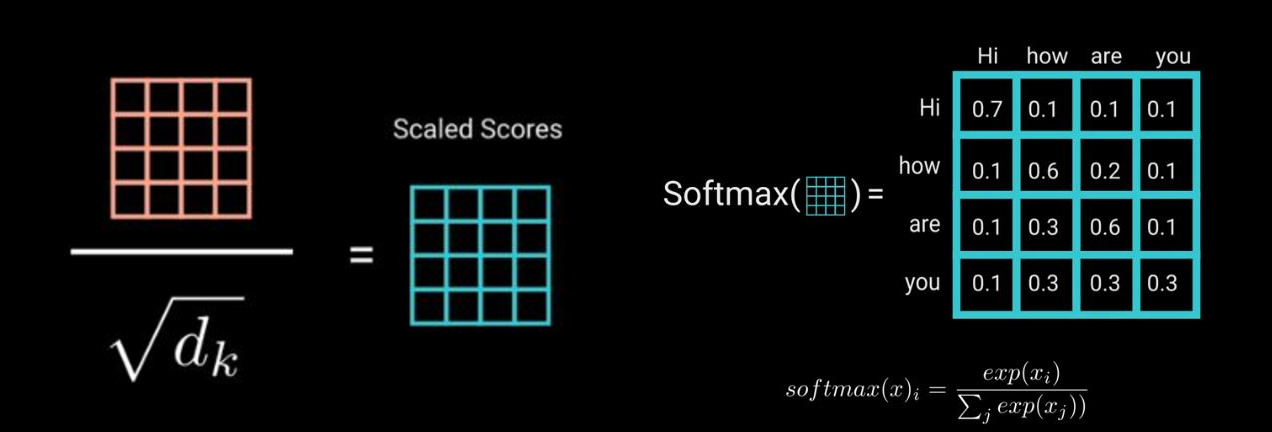

In [9]:
np.matmul(q, k.T)

array([[-3.66874   ,  5.26628917,  4.00227403, -7.44249793],
       [ 1.32018854,  0.84850977,  0.56295122, -0.38925405],
       [-2.49027906, -1.69212905, -1.1291951 ,  1.50346937],
       [ 3.56171224,  1.92949279,  0.16500725, -2.02200851]])

In [10]:
#we need sqrt(d_k) in denominator to reduce the variance
q.var(), k.var(), np.matmul(q, k.T).var()

(1.258707725548844, 0.8284640916497792, 9.290741745324887)

In [11]:
scaled = np.matmul(q, k.T) / math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(1.258707725548844, 0.8284640916497792, 1.1613427181656109)

In [12]:
scaled

array([[-1.29709547,  1.86191439,  1.41501755, -2.63132038],
       [ 0.46675714,  0.29999351,  0.19903331, -0.13762209],
       [-0.8804466 , -0.59825796, -0.39923076,  0.53155669],
       [ 1.25925544,  0.68217872,  0.05833887, -0.71488796]])

**Masking :**
masking for the decoder part:

to ensure words doesn't get context from future generated words.

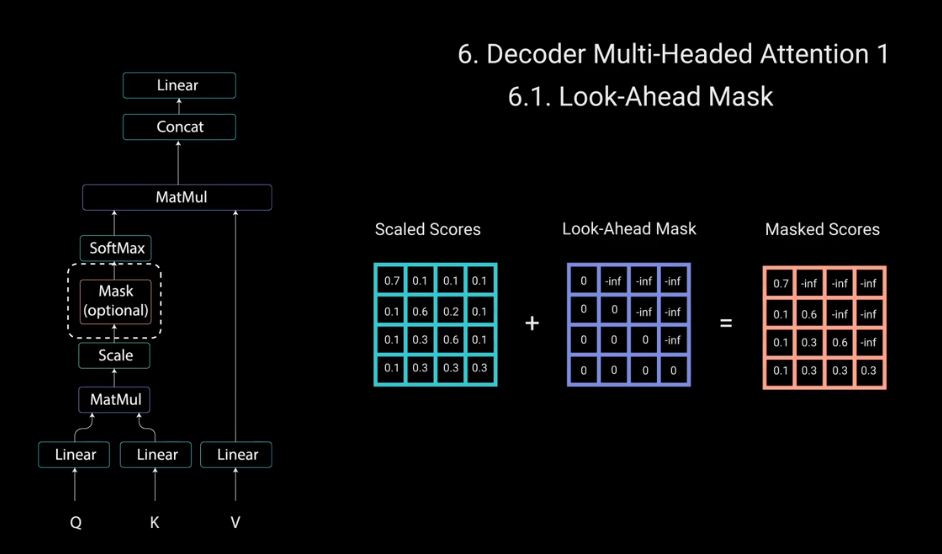

In [13]:
mask = np.tril(np.ones( (L, L) ))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [14]:
mask[mask == 0] = -np.infty
mask[mask == 1] = 0

In [15]:
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [16]:
scaled + mask

array([[-1.29709547,        -inf,        -inf,        -inf],
       [ 0.46675714,  0.29999351,        -inf,        -inf],
       [-0.8804466 , -0.59825796, -0.39923076,        -inf],
       [ 1.25925544,  0.68217872,  0.05833887, -0.71488796]])

**SOFTMAX Function:**

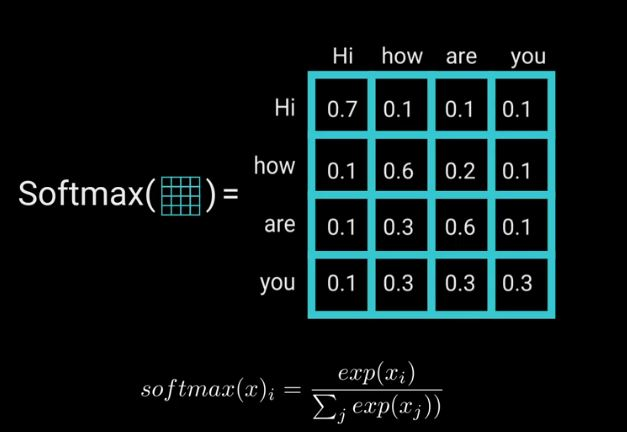

In [17]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

In [18]:
attention = softmax(scaled + mask)

In [19]:
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.54159456, 0.45840544, 0.        , 0.        ],
       [0.25354524, 0.3362083 , 0.41024646, 0.        ],
       [0.49966622, 0.28058132, 0.1503587 , 0.06939376]])

In [20]:
new_v = np.matmul(attention, v)
new_v

array([[ 1.03435299, -1.2690233 , -0.58672212, -1.54268604,  1.0306054 ,
        -2.17923875,  0.99494226,  0.97747002],
       [ 0.71665869, -0.48349889, -0.63379976, -0.19433946,  0.55454368,
        -0.5580467 ,  0.11187364, -0.22051988],
       [-0.0670633 ,  0.48907973,  0.06470994, -0.29075239, -0.03486602,
        -0.25039512,  0.61656696,  0.20263349],
       [ 0.45765819, -0.33085248, -0.2175461 , -0.56205777,  0.42722074,
        -0.70063124,  0.44289716,  0.22274487]])

In [21]:
v

array([[ 1.03435299, -1.2690233 , -0.58672212, -1.54268604,  1.0306054 ,
        -2.17923875,  0.99494226,  0.97747002],
       [ 0.34131083,  0.44457853, -0.68942082,  1.39869828, -0.00791131,
         1.35735113, -0.93144983, -1.63591496],
       [-1.08244714,  1.61211276,  1.08534644, -0.90156939, -0.71545106,
        -0.37590142,  1.65136158,  1.2305013 ],
       [ 0.11264471, -0.92083224,  1.52559044, -0.69342655,  0.31783962,
         0.92131381, -0.59358418,  0.11999247]])

**Function to wrap it all**

In [22]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask= None):
  d_k = q.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled)
  out = np.matmul(attention, v)
  return out, attention

In [23]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[ 1.73742757  1.32160863 -0.94906662 -3.69249585  1.03443318 -1.40434221
  -0.36132255  1.14402465]
 [ 1.23881778 -0.83675353 -0.03357018 -0.22818115 -1.05809573 -1.00187761
  -0.32746587  0.73547724]
 [-1.11333408  0.6935187   1.13220436 -0.32130963 -0.67059391  0.12340236
  -0.29572647  0.27592668]
 [ 0.76320072  0.84650634 -1.13741988  1.38665182  0.82190223 -0.09284005
   1.17841092 -1.05602639]]
K
 [[ 1.10769874 -0.9711536   0.85148176  1.12455025  0.62614322 -1.39115454
   0.59552151 -1.51699205]
 [ 1.29730118  0.82453343 -0.96106862 -0.31636941 -0.00350175  0.54790002
   0.24707431  0.61592723]
 [-0.04578109  0.1948806  -1.70365708 -0.48896938 -0.22635054  0.33376372
   0.01421176  0.97013297]
 [-0.02509755 -0.26579305  0.40715375  0.56045725 -1.47938145  1.77366876
  -1.46530454 -0.96152185]]
V
 [[ 1.03435299 -1.2690233  -0.58672212 -1.54268604  1.0306054  -2.17923875
   0.99494226  0.97747002]
 [ 0.34131083  0.44457853 -0.68942082  1.39869828 -0.00791131  1.35735113
  -0.9